<a href="https://colab.research.google.com/github/margaretnyamadi/fraud_detection_case_study/blob/main/Fraud_Detection_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [26]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Colab Notebooks/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [27]:
%cd /content/gdrive/My Drive/Colab Notebooks/Kaggle
#changing the working directory

/content/gdrive/My Drive/Colab Notebooks/Kaggle


In [ ]:
!kaggle datasets download -d ntnu-testimon/paysim1

 96% 171M/178M [00:01<00:00, 110MB/s]
100% 178M/178M [00:01<00:00, 103MB/s]


In [28]:
!ls

kaggle.json  PS_20174392719_1491204439457_log.csv


In [ ]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

In [29]:
# open csv and read in data
import pandas as pd

df = pd.read_csv('PS_20174392719_1491204439457_log.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [30]:
pd.set_option('display.max_columns', None)
print(df.head(n=10))
# payment type vs fraud

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815      170136.00       160296.36   
1     1   PAYMENT   1864.28  C1666544295       21249.00        19384.72   
2     1  TRANSFER    181.00  C1305486145         181.00            0.00   
3     1  CASH_OUT    181.00   C840083671         181.00            0.00   
4     1   PAYMENT  11668.14  C2048537720       41554.00        29885.86   
5     1   PAYMENT   7817.71    C90045638       53860.00        46042.29   
6     1   PAYMENT   7107.77   C154988899      183195.00       176087.23   
7     1   PAYMENT   7861.64  C1912850431      176087.23       168225.59   
8     1   PAYMENT   4024.36  C1265012928        2671.00            0.00   
9     1     DEBIT   5337.77   C712410124       41720.00        36382.23   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0            0.00        0               0  
1  M2044282225            

Visualization

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

Text(0.5, 0, 'Payment Type')

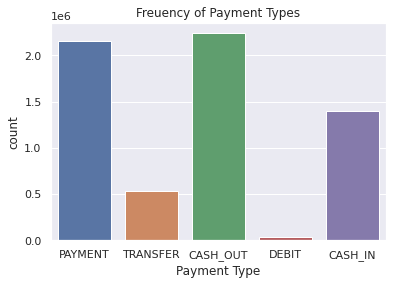

In [ ]:
# frequency of payment types
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="type", data=df)
ax.set_title('Freuency of Payment Types')
ax.set_xlabel('Payment Type')

Text(0, 0.5, 'amount')

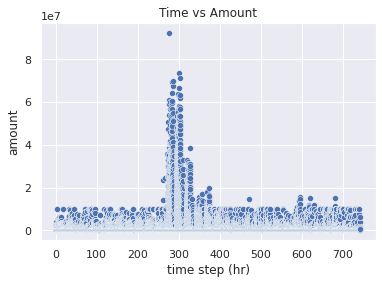

In [ ]:
# step vs amount
ax = sns.scatterplot(data=df, x="step", y="amount")
ax.set_title('Time vs Amount')
ax.set_xlabel('time step (hr)')
ax.set_ylabel('amount')

Text(0.5, 0, 'isFraud')

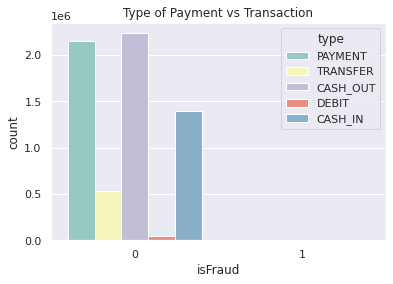

In [ ]:
# isFraud vs type
ax = sns.countplot(x="isFraud", hue="type", data=df, palette="Set3");
ax.set_title('Type of Payment vs Transaction')
ax.set_xlabel('isFraud')

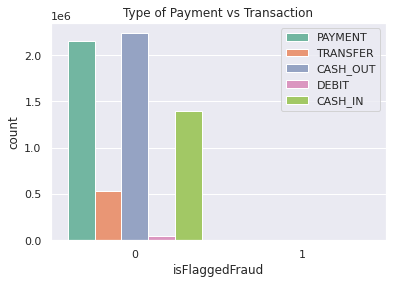

In [ ]:
# isFlaggedFraud vs type
ax = sns.countplot(x="isFlaggedFraud", hue="type", data=df, palette="Set2");
ax.set_title('Type of Payment vs Transaction')
ax.set_xlabel('isFlaggedFraud')
plt.legend(loc='upper right')

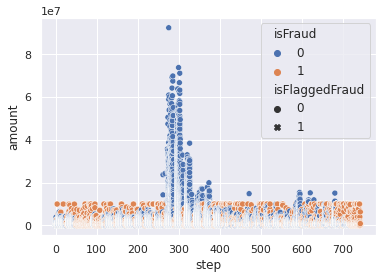

In [13]:
ax = sns.scatterplot(data=df, x="step", y="amount", hue="isFraud", style="isFlaggedFraud")

Data Cleansing

In [14]:
#check for null values
df.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,False,False,False,False,False,False,False,False,False,False,False
6362616,False,False,False,False,False,False,False,False,False,False,False
6362617,False,False,False,False,False,False,False,False,False,False,False
6362618,False,False,False,False,False,False,False,False,False,False,False


In [15]:
# drop rows with at least 1 null value
df.dropna(axis = 1) 

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


From the data visualization, there is a significant difference in the instances of fraud vs not-fraud in the datasets. Such large differences in the categories I want to predict can cause the model to be overly trained on one type versus another resulting in a uselessmodel. The models need to be trained on datatsets that are equally representative of the categories I want to predict i.e. Fraud vs Non-Fraud,  which would allow for a higher accuracy in the model prediction. Therefore, I will use the number of instances of fraud as the number of my training data set. Afterwards, I will normalize the numerical values in the dataset to transform all features to the same scale, minimizing the influence of extremely large or small weights.

In [32]:
# Create a more equal training data set; less amount of data but more useful
not_Fraud = df[df['isFraud'] == 0]
Fraud = df[df['isFraud'] == 1]

num = len(Fraud.index)

print("Instances of no fraud: ", len(not_Fraud.index))
print("Instances of fraud: ", len(Fraud.index))
print(num)

Instances of no fraud:  6354407
Instances of fraud:  8213
8213


In [33]:
not_Fraud = df.loc[df['isFraud'] == 0][:num] # get length of df the same as Fraud df
eq_df = pd.concat([Fraud, not_Fraud]) # create new df
eq_df = eq_df.sample(frac = 1, random_state = 42)
not_Fraud = eq_df[eq_df['isFraud'] == 0]
Fraud = eq_df[eq_df['isFraud'] == 1]

n1 = len(not_Fraud.index)
n2 = len(Fraud.index)

print(n1,n2)

8213 8213


In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(eq_df['step'].values.reshape(-1, 1))
eq_df['step'] = scaler.fit_transform(eq_df['step'].values.reshape(-1, 1))

scaler.fit(eq_df['amount'].values.reshape(-1, 1))
eq_df['amount'] = scaler.fit_transform(eq_df['amount'].values.reshape(-1, 1))

scaler.fit(eq_df['oldbalanceOrg'].values.reshape(-1, 1))
eq_df['oldbalanceOrg'] = scaler.fit_transform(eq_df['oldbalanceOrg'].values.reshape(-1, 1))

scaler.fit(eq_df['newbalanceOrig'].values.reshape(-1, 1))
eq_df['newbalanceOrig'] = scaler.fit_transform(eq_df['newbalanceOrig'].values.reshape(-1, 1))

scaler.fit(eq_df['oldbalanceDest'].values.reshape(-1, 1))
eq_df['oldbalanceDest'] = scaler.fit_transform(eq_df['oldbalanceDest'].values.reshape(-1, 1))

scaler.fit(eq_df['newbalanceDest'].values.reshape(-1, 1))
eq_df['newbalanceDest'] = scaler.fit_transform(eq_df['newbalanceDest'].values.reshape(-1, 1))

In [35]:
eq_df.dtypes

step              float64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

Train, Test, and Validate

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

training,test = train_test_split(eq_df, train_size = 0.7, test_size = 0.3, shuffle=True)
training,valid = train_test_split(training, train_size = 0.7, test_size =0.3, shuffle=True) 

training_label = training.pop('isFraud')
test_label = test.pop('isFraud')
valid_label = valid.pop('isFraud')


In [21]:
training.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud'],
      dtype='object')

In [37]:
import pprint

pp = pprint.PrettyPrinter(indent=4)

dTree = DecisionTreeClassifier()
nbayes = GaussianNB()

#dummy_train = pd.get_dummies(training)
#dummy_new = pd.get_dummies(test)
#dummy_new.reindex(columns = training.columns, fill_value=0)

training['label'] = 'train'
test['label'] = 'test'
valid['label'] = 'valid'

concat_df = pd.concat([training, test, valid])

features_df = pd.get_dummies(concat_df, columns=['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud'], dummy_na=True)

# Split your data
train_df = features_df[features_df['label'] == 'train']
test_df = features_df[features_df['label'] == 'test']
valid_df =features_df[features_df['label'] == 'valid']

# Drop your labels
train_df = train_df.drop('label', axis=1)
test_df = test_df.drop('label', axis=1)
valid_df = valid_df.drop('label', axis=1)

dTree.fit(train_df, training_label)
nbayes.fit(train_df, training_label)

dTree_predict = dTree.predict(test_df)
nbayes_predict = nbayes.predict(test_df)

accuracy = dict()
accuracy['DecisionTree'] = accuracy_score(test_label, dTree_predict)
accuracy['Naive_bayes'] = accuracy_score(test_label, nbayes_predict)

pp.pprint(accuracy)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


{'DecisionTree': 0.9941152597402597, 'Naive_bayes': 0.984577922077922}


In [38]:
dTree_predict = dTree.predict(valid_df)
nbayes_predict = nbayes.predict(valid_df)

accuracy['DecisionTree'] = accuracy_score(valid_label, dTree_predict)
accuracy['Naive_bayes'] = accuracy_score(valid_label, nbayes_predict)

pp.pprint(accuracy)

{'DecisionTree': 0.9933333333333333, 'Naive_bayes': 0.9857971014492753}


                     0
DecisionTree  0.993333
Naive_bayes   0.985797


Text(0, 0.5, 'accuracy')

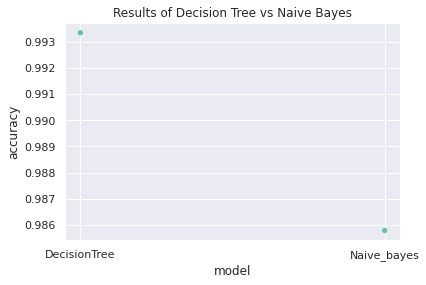

In [64]:
# plot results
df2 = pd.DataFrame.from_dict(accuracy,orient='index')
print(df2)
ax = sns.scatterplot(data=df2, palette="Set2")
ax.legend_.remove()
ax.set_title('Results of Decision Tree vs Naive Bayes')
ax.set_xlabel('model')
ax.set_ylabel('accuracy')